#  Veri Ön İşleme

In [1]:
#kütüphane yükle
import pandas as pd
import numpy as np

In [2]:
#veriyi oku
df=pd.read_csv("../input/monster_com-job_sample.csv")

In [3]:
# veri ile ilgili temel bilgiler
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   date_added       122 non-null    object
 3   has_expired      22000 non-null  object
 4   job_board        22000 non-null  object
 5   job_description  22000 non-null  object
 6   job_title        22000 non-null  object
 7   job_type         20372 non-null  object
 8   location         22000 non-null  object
 9   organization     15133 non-null  object
 10  page_url         22000 non-null  object
 11  salary           3446 non-null   object
 12  sector           16806 non-null  object
 13  uniq_id          22000 non-null  object
dtypes: object(14)
memory usage: 2.3+ MB


In [4]:
# veri balance değil o yüzden verideki eksik verileri kontrol etmemiz gerekmektedir.
df.isnull().sum()

country                0
country_code           0
date_added         21878
has_expired            0
job_board              0
job_description        0
job_title              0
job_type            1628
location               0
organization        6867
page_url               0
salary             18554
sector              5194
uniq_id                0
dtype: int64

In [5]:
#eksik değerlerin etkisini yüzdelik olarak görmek için eksik değer tablasunu bir fonksiyonla oluşturuyoruz
def eksik_deger_tablosu(df): 
    eksik_deger = df.isnull().sum()
    eksik_deger_yuzde = 100 * df.isnull().sum()/len(df)
    eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
    eksik_deger_tablo_son = eksik_deger_tablo.rename(
    columns = {0 : 'Eksik Değerler', 1 : '% Değeri'})
    return eksik_deger_tablo_son
  
eksik_deger_tablosu(df)

,Eksik Değerler,% Değeri
country,0,0.000000
country_code,0,0.000000
date_added,21878,99.445455
has_expired,0,0.000000
job_board,0,0.000000
job_description,0,0.000000
job_title,0,0.000000
job_type,1628,7.400000
location,0,0.000000
organization,6867,31.213636


In [6]:
#burda veriyi temizlerken belirlediğimiz oranın üstünde eksik veri olan parametreleri çıkartalım
#tek tek parametlerileri dropna komutu ile de silebiliriz lakin onun yerine daha temiz bir kod yazmak için 
#%70 üzerinde null değer içeren parametreleri silmek için aşağıdaki kodu kullanırız
tr = len(df) * .3
df.dropna(thresh = tr, axis = 1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   has_expired      22000 non-null  object
 3   job_board        22000 non-null  object
 4   job_description  22000 non-null  object
 5   job_title        22000 non-null  object
 6   job_type         20372 non-null  object
 7   location         22000 non-null  object
 8   organization     15133 non-null  object
 9   page_url         22000 non-null  object
 10  sector           16806 non-null  object
 11  uniq_id          22000 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


#burda veri setindeki parametreleri biliyorsanız boşlukları genel tekrarlarla doldurabilirsiniz mesela sector deki değerlere bakarak  en fazla tekrar eden değerle doldurabiliriz. Bu işlem veri biliminde fazlaca kullanılsa da daha sağlıklı sonuçlar için verileri balance hale getirmeliyiz.

In [7]:
# en çok tekrar eden değeri bu kodla görebiliriz
df['sector'].value_counts()

Experienced (Non-Manager)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [8]:
#en fazla tekrar eden değerle sektör parametresi balance hale gelir, bu işlemi bir fonksiyon yazarak diğer parametrelere uygulabiliriz.
df['sector'] = df['sector'].fillna("Experienced (Non-Manager)")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   has_expired      22000 non-null  object
 3   job_board        22000 non-null  object
 4   job_description  22000 non-null  object
 5   job_title        22000 non-null  object
 6   job_type         20372 non-null  object
 7   location         22000 non-null  object
 8   organization     15133 non-null  object
 9   page_url         22000 non-null  object
 10  sector           22000 non-null  object
 11  uniq_id          22000 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


In [10]:
# balance olmayan verilerin tamamını silerek  işleme devam edeceğiz
#%5 üzerinde null değer içeren parametreleri silmek için aşağıdaki kodu kullanırız
tr = len(df) * .95
df.dropna(thresh = tr, axis = 1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   has_expired      22000 non-null  object
 3   job_board        22000 non-null  object
 4   job_description  22000 non-null  object
 5   job_title        22000 non-null  object
 6   location         22000 non-null  object
 7   page_url         22000 non-null  object
 8   sector           22000 non-null  object
 9   uniq_id          22000 non-null  object
dtypes: object(10)
memory usage: 1.7+ MB


### Yeni Öz Nitelik Oluşturma

In [11]:
#Apply fonksiyonu kullanarak sectordekilerin seviyesine göre junior olup olmamasına bakan yeni öznitelik olarak ekledik
def seviye(junior):
    return (junior =="Entry Level ")

df['Junior'] = df['sector'].apply(seviye)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   has_expired      22000 non-null  object
 3   job_board        22000 non-null  object
 4   job_description  22000 non-null  object
 5   job_title        22000 non-null  object
 6   location         22000 non-null  object
 7   page_url         22000 non-null  object
 8   sector           22000 non-null  object
 9   uniq_id          22000 non-null  object
 10  Junior           22000 non-null  bool  
dtypes: bool(1), object(10)
memory usage: 1.7+ MB


###   Kategorik Değerleri Dönüştürme (Label / One-hot Encoding)

Label Encoder
Elimizdeki verileri direk sayısal temsillerine dönüştürmeye yarar ve kategorik her veriye sayısal bir değer atar. Genelde sadece iki değere sahip özniteliklerde kullanılır. 

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
df['Junior_Encoded']= label_encoder.fit_transform(df['Junior'])

df["Junior_Encoded"]

0        0
1        0
2        0
3        0
4        0
        ..
21995    0
21996    0
21997    0
21998    0
21999    0
Name: Junior_Encoded, Length: 22000, dtype: int64

In [13]:
df['location_Encoded']= label_encoder.fit_transform(df['location'])
df['location_Encoded']

0        4653
1        4658
2        2347
3        2525
4        1271
         ... 
21995    1561
21996    1589
21997    1508
21998    1514
21999    1561
Name: location_Encoded, Length: 22000, dtype: int32

One-Hot Encoding
Bu yaklaşımda kategorik türde özniteliğe ait tüm değerler yeni birer öznitelik haline getirilir. Her örnek asıl olarak hangi yeni özniteliğe sahipse (kategorik değere) onun değeri “1”, diğer yeni özniteliklerin değerleri ise “0” olur. Aslında bir çeşit “ikili kodlama” (binary coding) olarak da düşünülebilir.

In [14]:
onehotencoder = preprocessing.OneHotEncoder()

In [15]:
df['country'] = pd.Categorical(df['country'])
dfDummies = pd.get_dummies(df['country'], prefix = 'Amerika')
dfDummies.head(1)

,Amerika_United States of America
0,1


In [16]:
#Son olarak eski dataframe (df) ile yeni dataframe (dfDummies) aşağıdaki gibi birleştirilerek (pd.concat) son/yeni dataframe (df_new) elde edilir.
df_new = pd.concat([df, dfDummies], axis=1)
df_new.head(1)

,country,country_code,has_expired,job_board,job_description,job_title,location,page_url,sector,uniq_id,Junior,Junior_Encoded,location_Encoded,Amerika_United States of America
0,United States of America,US,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,"Madison, WI 53702",http://jobview.monster.com/it-support-technici...,IT/Software Development,11d599f229a80023d2f40e7c52cd941e,False,0,4653,1


### Veriyi Ölçeklendirme (Scaling) ve Normalize Etme (Normalization)

Veri ölçeklendirme ve normalize etme adımları birbirlerine benzer işler gibi görünseler de (hatta birbirleri yerine kullanılsalar da) uygulanma şekilleri farklıdır. Ölçeklendirme işleminde elimizdeki verinin sadece aralığını (range) değiştirirken (örneğin 0–1 arası ya da 1–100 arası gibi), veriyi normalize etme sürecinde verinin dağılımını normal bir dağılım olarak değiştiriyoruz.

In [17]:
df= pd.read_csv("team.csv")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   season                   29 non-null     int64  
 1   team                     29 non-null     object 
 2   wins                     29 non-null     int64  
 3   losses                   29 non-null     int64  
 4   scores_for               29 non-null     int64  
 5   scores_against           29 non-null     int64  
 6   score_differential       29 non-null     int64  
 7   one_point_goals          29 non-null     int64  
 8   two_point_goals          29 non-null     int64  
 9   assists                  29 non-null     int64  
 10  shots                    29 non-null     int64  
 11  shot_percentage          29 non-null     float64
 12  x2_point_shots           29 non-null     int64  
 13  x2_point_shot_pecentage  29 non-null     float64
 14  shots_on_goal            29 

#### Min-Maks Ölçeklendirme

In [19]:
#wins özniteliğini ölçeklendirmek istiyoruz
x = df[['wins']].values.astype(float)

#Ölçeklendirme için MinMaxScaler fonksiyonunu kullanıyoruz.
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df['wins2'] = pd.DataFrame(x_scaled)

df['wins2']

0     0.777778
1     0.666667
2     0.555556
3     0.555556
4     0.555556
5     0.222222
6     0.444444
7     0.333333
8     0.333333
9     0.222222
10    0.111111
11    0.111111
12    0.000000
13    0.666667
14    0.666667
15    0.555556
16    0.555556
17    0.555556
18    0.444444
19    0.333333
20    0.222222
21    1.000000
22    0.777778
23    0.666667
24    0.666667
25    0.555556
26    0.444444
27    0.222222
28    0.111111
Name: wins2, dtype: float64

### Aykırı/Uç Verileri (Outliers) Tespit Etme

<AxesSubplot:xlabel='wins2'>

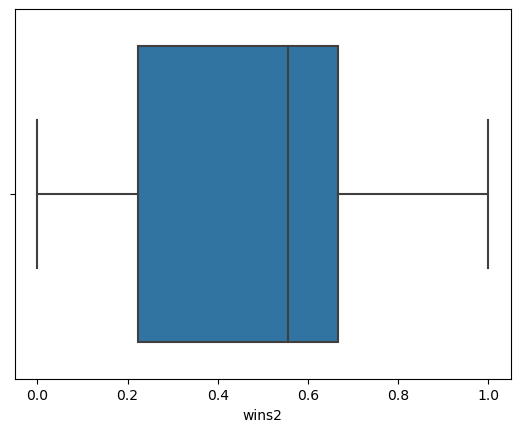

In [20]:
import seaborn as sns
sns.boxplot(x=df['wins2'])

In [21]:
Q1 = df.wins2.quantile(0.25)
Q2 = df.wins2.quantile(0.5)
Q3 = df.wins2.quantile(0.75)
Q4 = df.wins2.quantile(1)
IQR = Q3 - Q1

print("Q1-->", Q1)
print("Q3-->", Q3)
print("Q2-->", Q2)
print("Q4-->", Q4)
print("IQR-->", IQR)
print("Alt sınır: Q1 - 1.5 * IQR--->", Q1 - 1.5 * IQR)
print("Üst sınır: Q3 + 1.5 * IQR--->", Q3 + 1.5 * IQR)

Q1--> 0.2222222222222222
Q3--> 0.6666666666666666
Q2--> 0.5555555555555556
Q4--> 1.0
IQR--> 0.4444444444444444
Alt sınır: Q1 - 1.5 * IQR---> -0.4444444444444444
Üst sınır: Q3 + 1.5 * IQR---> 1.3333333333333333


In [22]:
outliers_df = df[(df.wins2 < (Q1-1.5*IQR))|(df.wins2 > Q3+1.5*IQR)]